# Figures for SHINE Poster 2018

In [1]:
# Setup fonts for portability
import matplotlib.font_manager
custom_fonts = matplotlib.font_manager.createFontList(matplotlib.font_manager.findSystemFonts(fontpaths='../../fonts/'))
matplotlib.font_manager.fontManager.ttflist.extend(custom_fonts)

In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sunpy.map import Map
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize,SqrtStretch,AsinhStretch

import synthesizAR

%matplotlib inline

In [3]:
ar = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/base_noaa1158/')

In [4]:
rwb_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'rwb_nice', [(215/255, 48/255, 31/255), (1, 1, 1), (5/255, 112/255, 176/255)], N=1000)

In [5]:
columnwidth = 2544.81458 #document width of my poster

In [6]:
def get_figsize(wf=0.5, hf=(5.**0.5-1.0)/2.0, ):
    """Parameters:
      - wf [float]:  width fraction in columnwidth units
      - hf [float]:  height fraction in columnwidth units.
                     Set by default to golden ratio.
      - columnwidth [float]: width of the column in latex. Get this from LaTeX 
                             using \showthe\columnwidth
    Returns:  [fig_width,fig_height]: that should be given to matplotlib
    """
    fig_width_pt = columnwidth*wf 
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*hf      # height in inches
    return (fig_width, fig_height)

## AR in HMI and AIA

In [7]:
aia_map = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153348_171_cutout.fits')

In [8]:
hmi_map = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/hmi/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits')
hmi_map = hmi_map.rotate(order=3)
hmi_map = hmi_map.submap(aia_map.bottom_left_coord,aia_map.top_right_coord)

/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


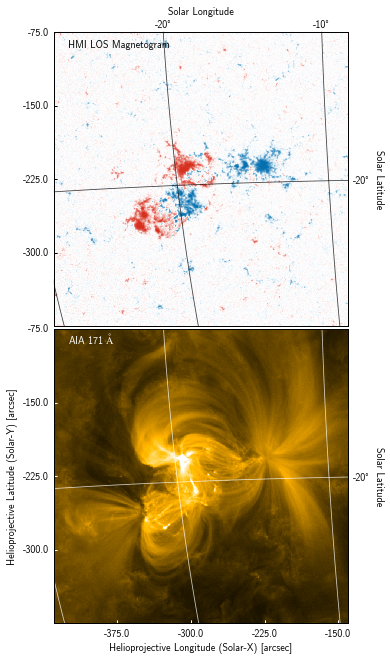

In [9]:
fig = plt.figure(figsize=get_figsize(wf=0.5,))
plt.subplots_adjust(hspace=0.01)
####################
# HMI
ax = fig.add_subplot(2,1,1,projection=hmi_map,)
hmi_map.plot(title=False,annotate=False,norm=matplotlib.colors.SymLogNorm(100,vmin=-1e3,vmax=1e3),cmap=rwb_cmap)
#for l in ar_base.loops[::10]:
#    c = l.coordinates.transform_to('heliographic_stonyhurst').transform_to(m.coordinate_frame)
#    ax.plot_coord(c, '-', color='k', lw=1, alpha=0.35)
ax.grid(alpha=0)
lon,lat = ax.coords[0],ax.coords[1]
lon.set_ticklabel_visible(False)
lon.set_ticks_visible(False)
hgs_lon,hgs_lat = hmi_map.draw_grid(axes=ax,grid_spacing=10*u.deg,alpha=0.75,color='k')
#hgs_lat.set_axislabel('')
#hgs_lon.set_axislabel('')
#hgs_lat.set_ticklabel_visible(False)
#hgs_lon.set_ticklabel_visible(False)
hgs_lat.set_ticks_visible(False)
hgs_lon.set_ticks_visible(False)
xtext,ytext = hmi_map.world_to_pixel(SkyCoord(Tx=-425*u.arcsec,Ty=-90*u.arcsec,frame=hmi_map.coordinate_frame))
xtext,ytext = int(xtext.value),int(ytext.value)
ax.text(xtext,ytext,'HMI LOS Magnetogram',color='k')#,fontsize=plt.rcParams['axes.labelsize'])
#####################
# AIA -- 171
ax = fig.add_subplot(2,1,2,projection=aia_map,)
aia_map.plot(title=False,annotate=True,norm=ImageNormalize(vmin=0,vmax=5e3,stretch=AsinhStretch(0.1)))
#for l in ar_base.loops[::10]:
#    c = l.coordinates.transform_to('heliographic_stonyhurst').transform_to(m.coordinate_frame)
#    ax.plot_coord(c, '-', color='w', lw=1, alpha=0.35)
ax.grid(alpha=0)
lon,lat = ax.coords[0],ax.coords[1]
lon.set_ticks(color='w')
lat.set_ticks(color='w')
hgs_lon,hgs_lat = aia_map.draw_grid(axes=ax,grid_spacing=10*u.deg,alpha=0.75,color='w')
#hgs_lat.set_axislabel('')
hgs_lon.set_axislabel('')
#hgs_lat.set_ticklabel_visible(False)
hgs_lon.set_ticklabel_visible(False)
hgs_lat.set_ticks_visible(False)
hgs_lon.set_ticks_visible(False)
xtext,ytext = aia_map.world_to_pixel(SkyCoord(Tx=-425*u.arcsec,Ty=-90*u.arcsec,frame=aia_map.coordinate_frame))
xtext,ytext = int(xtext.value),int(ytext.value)
ax.text(xtext,ytext,'AIA 171 $\mathrm{\AA}$',color='w')#,fontsize=plt.rcParams['axes.labelsize'])
#######################
# Save
fig.savefig('../figures/hmi_plus_aia_plus_lines.pdf',)

## Heating

## Intensities

## Timelags

## Classifier